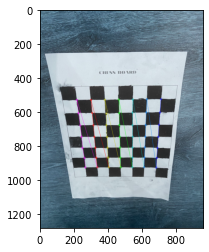

<Figure size 1080x1080 with 0 Axes>

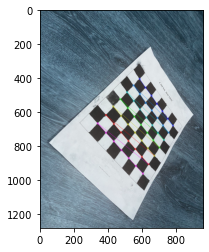

<Figure size 1080x1080 with 0 Axes>

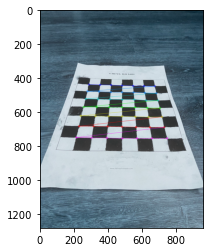

<Figure size 1080x1080 with 0 Axes>

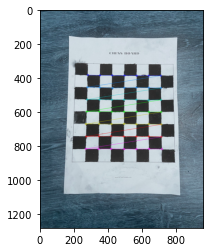

<Figure size 1080x1080 with 0 Axes>

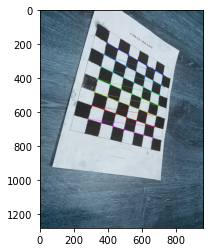

<Figure size 1080x1080 with 0 Axes>

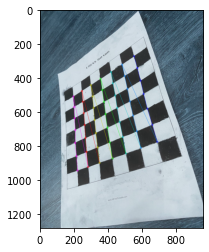

<Figure size 1080x1080 with 0 Axes>

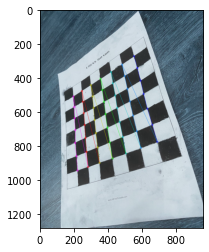

<Figure size 1080x1080 with 0 Axes>

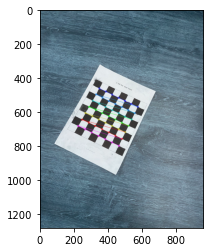

<Figure size 1080x1080 with 0 Axes>

Camera matrix : 

[[979.51341534   0.         517.39085808]
 [  0.         979.86759681 620.08076723]
 [  0.           0.           1.        ]]
dist : 

[[ 0.06407092  0.81922324 -0.01219903  0.00736849 -4.60565842]]
rvecs : 

(array([[ 0.29672868],
       [-0.30357617],
       [ 1.54576415]]), array([[-0.37214537],
       [-0.5273004 ],
       [ 0.77426432]]), array([[-0.78562717],
       [-0.05384456],
       [-0.00507888]]), array([[-0.11351339],
       [-0.02100298],
       [ 0.00526312]]), array([[-0.16540825],
       [-0.57187346],
       [ 0.25151396]]), array([[0.101888  ],
       [0.70676303],
       [1.19313986]]), array([[0.101888  ],
       [0.70676303],
       [1.19313986]]), array([[-0.2519842 ],
       [-0.01826982],
       [ 0.45080479]]))
tvecs : 

(array([[ 2.31083757],
       [-1.14711517],
       [12.0084622 ]]), array([[ 1.00547296],
       [-3.3824884 ],
       [15.64303502]]), array([[-3.5730302 ],
       [-2.79968675],
       [15.20077765]]), array([[-3.3465870

In [8]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

# Defining the dimensions of checkerboard
CHECKERBOARD = (7,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 


# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

# Extracting path of individual image stored in a given directory
images = glob.glob('./cheackboard/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+
    	cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2,ret)
    plt.imshow(img)
    plt.figure(figsize=(15,15))
    plt.show()
    cv2.imshow('img',img)
    cv2.waitKey(0)

cv2.destroyAllWindows()

h,w = img.shape[:2]

"""
Performing camera calibration by 
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the 
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

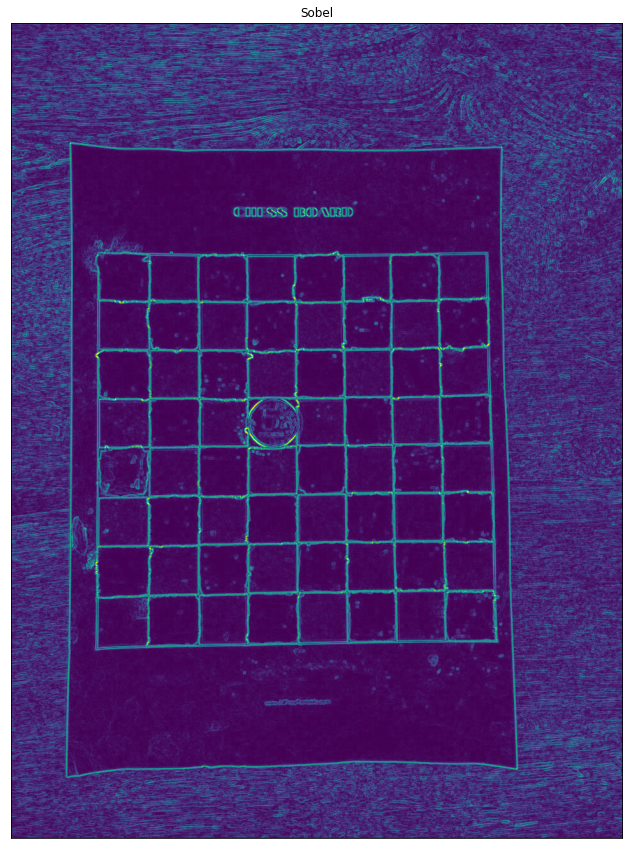

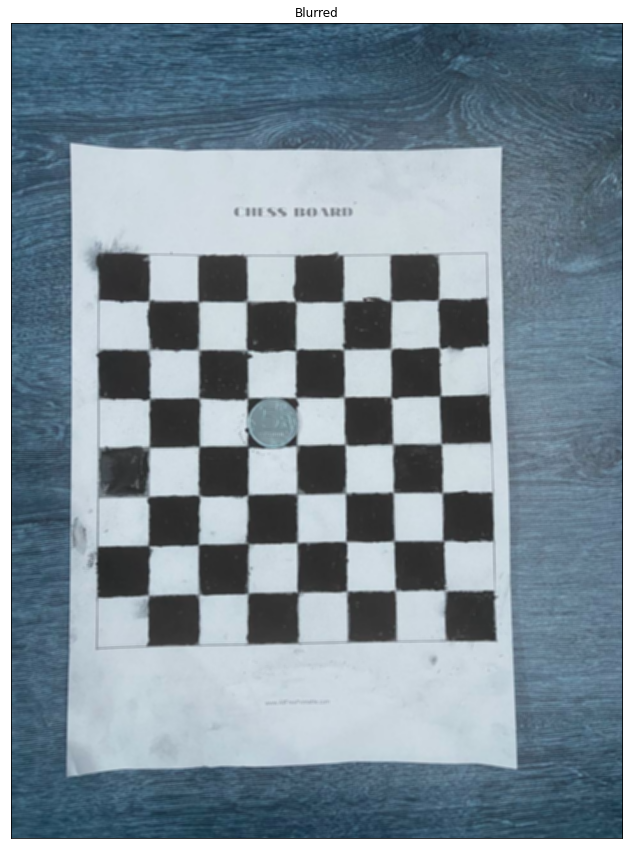

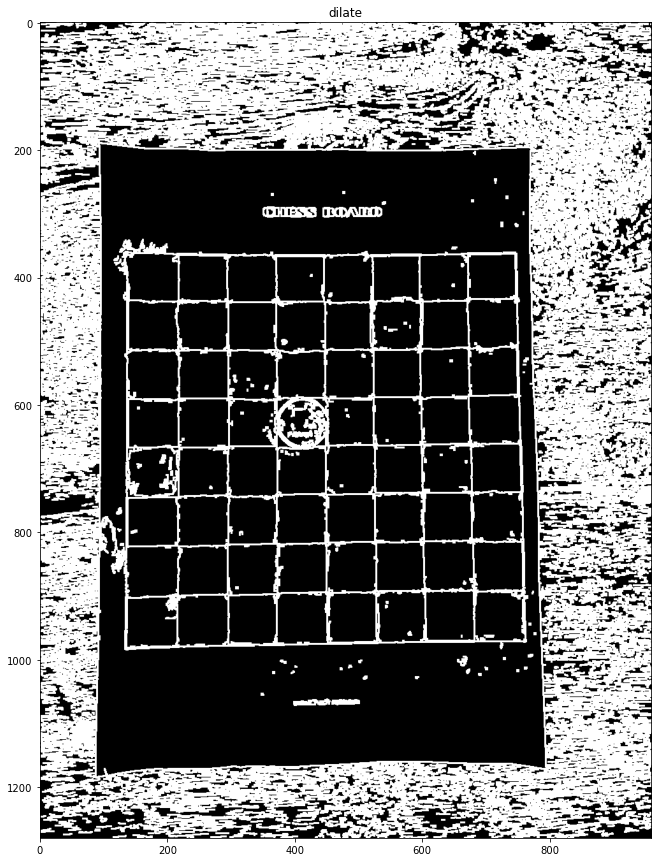

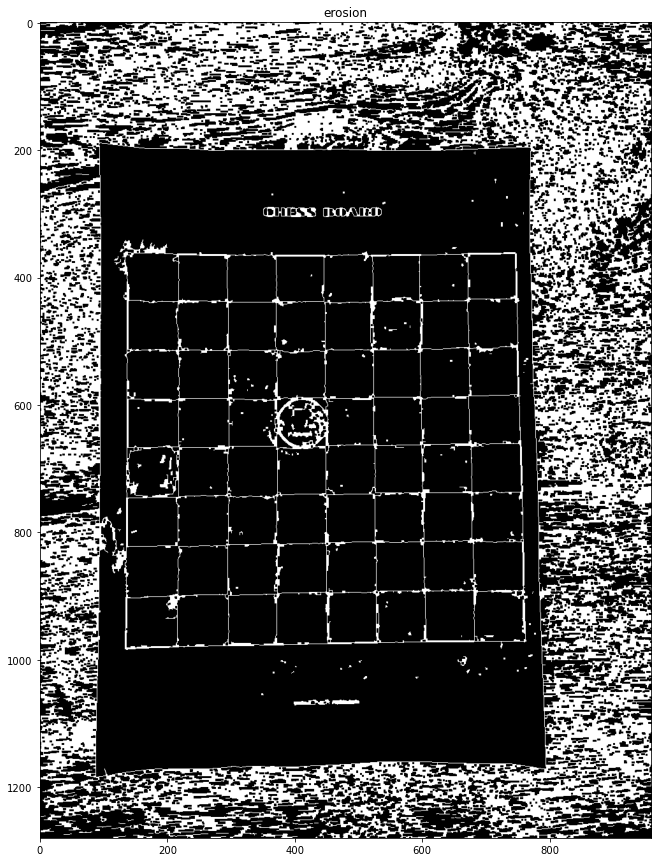

In [23]:
import numpy as np
import cv2 as cv
import sys
from matplotlib import pyplot as plt

def sobel():
    
    window_name = ('Sobel')
    scale = 1
    delta = 0
    ddepth = cv.CV_16S
    
    # Load the image
    src = cv.imread('cheackboard_object/coin.jpg', cv.IMREAD_COLOR)
    # Check if image is loaded fine
    src = cv.GaussianBlur(src, (3, 3), 0)
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    
    plt.figure(figsize=(15,15))
    plt.imshow(grad)
    plt.title('Sobel')
    plt.xticks([]), plt.yticks([])
    plt.show()
#     cv.imshow(window_name, grad)
#     cv.waitKey(0)
    return 0

sobel()

img = cv.imread('cheackboard_object/coin.jpg')
canny = cv.Canny(img, 100, 200)

blur = cv.blur(img,(5,5))
plt.figure(figsize=(15,15))
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()



dilate = cv.dilate(canny, kernel=kernel, iterations=1)
plt.figure(figsize=(15,15))
plt.imshow(dilate, cmap = 'gray')
plt.title('dilate')
plt.show()
    

erosion = cv2.erode(dilate, kernel=kernel, iterations=1)
plt.figure(figsize=(15,15))
plt.imshow(erosion, cmap = 'gray')
plt.title('erosion')
plt.show()
